<div style="text-align: right"> **ANDRA FEHMIU** </div>
<div style="text-align: right"> **SUPERVISOR: PROF. YILING CHEN** </div>
<div style="text-align: right"> **CURRICULUM PRACTICAL TRAINING RESEARCH ** </div>

# INDEPENDENT STUDY ON "EIGEN-VESTING": 
## USAGE OF LINEAR ALGEBRA IN PORTFOLIO CONSTRUCTION

In [187]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import math
=import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
from IPython.display import display
import warnings
#warnings.filterwarnings('ignore')
from pandas.core import datetools
%matplotlib inline

# INTRODUCTION 


### AIM 
The aim of this independent study is to explore the application of linear algebra to investing, I will be using eigendecomposition of the returns covariance matrix in attempt to optimize portfolio performance.

### MOTIVATION

#### *Modern Portfolio Theory and its Extension*

The Modern Portfolio Theory (MPT), a hypothesis developed by Harry Markowitz in his paper "Portfolio Selection", claims that given a certain level of market risk, investors can construct portfolios that optimize their expected return, arguing that risk is an inherent part of higher returns. MPT suggests that at each level of market risk, investors can construct an "efficient frontier" of optimal portfolios. It also emphasizes the reduction in riskiness of the portfolio as one of the benefits of diversification, which is achieved when investors construct portfolios with more than one stock. By investing in a diverse combination of stocks, investors reduce the risk inherent in any individual stock in that portfolio, given that the returns of the stocks in that portfolio are not correlated. Thus, Markowitz's theory highlights the importance of picking the right individual stocks to build a portfolio and hence, diversify it. In attempt to analyze the hypothesis put forth by the Modern Portfolio Theory, I will aim to build diversified portfolios that not only maximize absolute returns but also minimize risk to investors.

### DEFINITIONS, FORMULAS, AND ASSUMPTIONS
Before I begin with the real-world application of eigendecomposition to investing, I will define some common terms that will be used throughout this research. I will denote the covariance matrix of the returns over one of the 3 periods as $C_{yrstart,yrend}$. I will also define the price for asset i at a given time t as $p_{i,t}$, the return for stock i at time t as $r_{i,t} = (p_{i,t} - p_{i,t-1})/ p_{i,t-1}$, and the "weight" of stock i, or the dollar amount invested in each stock as percentage of the total capital, as $w_{i}$. A positive weight, $w_{i}$, indicates a "long position" in stock i, implying the investor is buying the stock with the expectation that the asset will rise in value-- conversely, a negative weight, $-w_{i}$, indicates a "short position" in stock i, implying the investor is borrowing capital to buy stock i and selling this stock i (which they do not own) because they believe the price of stock will decrease in value. The commonly known phrase in investing is: "buy low, sell high", which implies that an investor should go long a stock that is low in price but is expected to increase in value, and go short a stock, so borrow capital to sell a stock they don't own, which is high in price, and return this stock when its value falls. 

Moreover, if we have a set of stocks S and the corresponding vector of weights, where $w_{i}$ for i∈S then the pair (S,w) describes an investor's portfolio allocation. In my research, I will assume that the investors strategy is to buy and hold stocks (so no short-selling) and build the covariance matrix that denotes the risk of a portfolio using the formula covariance (or risk) matrix, $C_{yrstart,yrend}$. This can be used, for instance, in a “buy and hold” strategy for investing. If we had access to the covariance matrix Σ, then the risk (or variance) of the investing strategy is given by the formula risk=$w^TΣw$. This is an extremely important idea because now we have a formula for quantifing the risk for a given portfolio! Mathematically, the expression $w^TΣw$ is frequently used in different types of optimization problems. In the context of this study, if we minimize risk using this formula where the weights are of unit length in $L^2$ then *these weights are simply the entries of the eigenvectors associated with the smallest eigenvalue*. 

### DATA COLLECTION 
For this "eigen-vesting" analysis, I will use the historical returns of a randomly-selected subset of S&P500 companies to build the covariance matrix and perform Principal Component Analysis (PCA). By doing so, I aim to get an insight into the importance, or contribution, of each stock to a portfolio's performance and analyze the correlations between these stocks. In addition to using the historical daily returns of these S&P500 companies, I will also perform PCA and eigendecomposition using their Sharpe ratio data, also known as the risk-adjusted returns, and compare the portfolio performances in each case. 

Although mutual funds are required by the Security Exchange Committee to tell investors not to base their expectations of future results on past performance before they invest, emphasizing that past performance is not indicative of future results, I believe that it is important to look at the correlation of these stocks over a longer time period because the past is all we have, so the best we can do is to look at the historical data and analyze whether we can get any insight that could guide our future investment decisions. As a result, this study I will be analyzing the past performance of these S&P500 companies during the 2008-2018. I have chosen this period to include the stock performances during the most recent financial crisis in attempt to make the analysis robust to unusual circumstances.

In [461]:
# dataframe that includes names, symbols and sectors for each company in the S&P500 list
tickers_sp500 = pd.read_csv('Downloads/s-and-p-500-companies-financials_zip/data/constituents_csv.csv')
tickers_symbol = tickers_sp500.iloc[:,0]
tickers_symbol = tickers_symbol.astype(str)
tickers_symbol = tickers_symbol.tolist()

tickers_sp500.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


# Correlation, Covariance, and Principal Component Analysis in Finance

As discussed above, correlation is an important measure of a portfolio's diversification because it quantifies the extent to which a pair of stocks move in relation to one-another. The MPT advocates argue that investors should strategically invest in stocks that are less likely to move in the same direction at the same time to avoid any significant losses. In addition, an important property of a correlation matrix is that by definition, it is similar to a covariance matrix; this implies that these two matrices will have the same eigenvalues and eigenvectors. Due to this, by analyzing the covariance matrix of the stocks, we can also make inferences about the correlation matrix. A useful property about the covariance matrix is that it is a symmetric matrix, which means that its eigenvectors that are orthogonal to each other and its eigenvalues are all positive.    

To get an insight into the correlation matrix of a portfolio, we will analyze the eigendecomposition of the covariance matrix. This eigendecomposition is known as Principal Component Analysis (PCA) and is a technique that takes a dataset consisting of a set of tuples representing points and finds the direction along with the tuples line up best. The set of tuples is treated as matrix W and the eigenvectors for $W^TW$ are then found. Geometrically, the matrix W can be thought of as a rotation in a high-dimensional space and so when this transformation is applied to the original dataset, the axis corresponding to the principal eigenvector explains the largest amount of spread of this dataset. As such, the variance of the data is maximized along this axis. To recap, PCA is a technique that converts a set of observations of possible correlated variables into a set of values of linearly uncorrelated variables using orthogonal transformation; the values of these linearly uncorrelated variables obtained are known as principal components (PC). The first PC explains the largest portion of variance in the dataset and each subsequent PC explains the highest possible variance in the original dataset conditioned on being orthogonal to the previous PC. Thus, the resulting principal component vectors form an uncorrelated orthogonal basis.

In the context of this study, I have defined the covariance matrix as $Σ$ in the expression for risk, $w^TΣw$. The eigenvalues of the covariance matix $Σ$ represent the risk of a certain portfolio because each eigenvalue measures the variance of the associated eigenvector, or factor. Moreover, the eigenvectors can be interpreted as the weight allocations to a set of stocks. It is also important to highlight that these eigenvectors are uncorrelated to each other. To recap, the **eigenvectors** are the weight allocations to portfolios, which I will refer to as **"eigenportfolios"**, and the **eigenvalues** are the associated risk with these eigenportfolios.

## PRINCIPAL COMPONENT ANALYSIS OF 20 RANDOMLY-SELECTED S&P500 STOCKS

Principal Component Analysis (PCA) is performed by eigendecomposition of a square matrix, which in the context of this study is the covariance matrix of stock returns. PCA can be used in asset allocation by decomposing a matrix of returns into latent factors that represent the unobservable risk factors of those asset classes. This decomposition allows investors to get a better insight into portfolio diversification. In this study, by performing PCA on portfolios built from randomly-selected subsets of the S&P500 stocks, I aim to construct the optimal portfolio based on the correlations and contributions of the given stocks to the total return of a portfolio. After performing analysis based on the traditional measure of stock returns, as defined above, I will also perform PCA using the Sharpe ratio, also known as the risk-adjusted returns, and compare the obtained analysis.

Let's first generate a randomly-selected portfolio of 20 stocks from the S&P500 stock list.

### GENERATING THE RANDOM PORTFOLIO 

In [347]:
import random
tickers_random = random.sample(tickers_symbol, 20)

In [ ]:
# look at stock prices over the specified time periods above, starting at January 1, 2008
start = datetime.datetime(2008,1,1)
end = datetime.date.today()

# get daily prices from Yahoo for each stock in the S&P500 list for the specified time period
prices_random = pd.DataFrame()
for ticker in tickers_random: 
    prices_random[ticker] = data.DataReader(ticker, "yahoo", start, end).loc[:, 'Close']

### CLEANING AND PREPARING THE DATA 

In [351]:
# drop stock with no price history 
prices_random = prices_random.drop('TRIP', axis=1)

In [501]:
# get returns for each of the 20 randomly selected stocks from the daily prices above 
returns_random = prices_random.pct_change()
returns_random = returns_random.iloc[1:,] 
returns_random.head()

,HBI,RCL,COP,WMB,NKE,EW,MCO,CELG,DE,EA,CSCO,AOS,STI,WM,BWA,PFG,ED,BBT,AAL
Date,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.028701,-0.013801,0.004096,0.025713,-0.009008,0.011062,-0.022533,0.076674,0.041020,-0.010923,0.007913,-0.023104,-0.007935,0.000000,-0.024212,0.000441,-0.001247,-0.014552,-0.045045
2008-01-04,-0.054044,-0.048122,-0.030482,-0.030245,-0.015468,-0.008534,-0.030055,-0.004012,-0.041747,-0.029035,-0.023551,-0.042450,-0.020163,-0.037508,-0.043917,-0.013237,-0.002913,-0.060440,-0.024371
2008-01-07,-0.022195,-0.042559,-0.013675,-0.005058,0.005993,0.000441,0.031588,0.016918,-0.017559,-0.008806,0.000383,0.006966,0.008674,0.016747,0.000689,-0.001341,0.014190,0.014985,-0.014504
2008-01-08,0.014292,-0.042295,-0.022278,0.005366,-0.004508,-0.005074,-0.028871,-0.017429,-0.003846,-0.009809,-0.026789,0.025786,-0.030518,0.005068,0.009869,-0.020000,-0.005555,-0.032049,-0.099755
2008-01-09,0.007460,-0.025598,0.014544,0.011236,0.002264,0.015965,-0.003604,0.038097,-0.004656,-0.004673,0.031852,0.005212,0.039130,-0.017964,0.017955,0.006397,-0.010139,0.013765,-0.010899


In [356]:
# check if there are any null values 
returns_random.isnull().sum()

HBI     0
RCL     0
COP     0
WMB     0
NKE     0
EW      0
MCO     0
CELG    0
DE      0
EA      0
CSCO    0
AOS     0
STI     0
WM      0
BWA     0
PFG     0
ED      0
BBT     0
AAL     0
dtype: int64

### SPLITTING THE DATA INTO TRAINING AND TEST SETS

The dataset is split into in-sample and out-of-sample sets, which is a common way of splitting data into training and test sets in finance data analysis.

In [403]:
# in-sample set is defined by the 60-day period
training_period = 60
in_sample = returns_random.iloc[:(returns_random.shape[0]-training_period), :].copy()

## The Eigendecomposition of the Covariance Matrix
### LARGEST EIGENVALUE & MARKET EIGENPORTFOLIO
As Kim and Jeong's research suggests, the first principal component with the largest eigenvalue represents the eigenportfolio with the strongest market correlation given that the covariance matrix built from the dataset captures the market. Due to this, when building the eigenportfolios, I will look at the weight allocations associated with both the largest and the second largest eigenvalues.


### INTERPRETING THE EIGENVALUES & EIGENVECTORS 
A given number of PCs following the market component represent synchronized fluctutations of a group of stocks and the remaining PCs represent the randomness in the fluctuations; these representations are useful to determine the threshold number of PCs to cut off and omit the random fluctuation in stock returns by preserving a significant fraction of the variance, or risk sources, in the dataset. The rule applied in this study to determine the threshold number of PCs to retain is the cumulative variance desired in portfolio construction. The PC associated with the largest eigenvalue explains the most variance in original data set and the subsequent PCs are in descending order. 

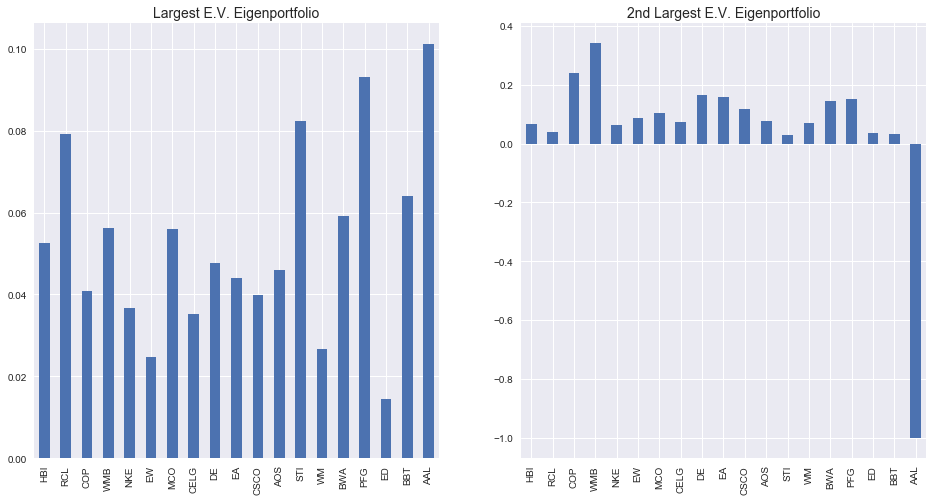

In [415]:
# decompose the covariance matrix for the training set, the in_sample time series
cov_matrix_random= in_sample.cov()
D_random, S_random = np.linalg.eigh(cov_matrix_random)
    
# normalize eigenportfolios to eigenvectors s.t. each sums to 1 
eigenportfolio_random_1 = S_random[:,-1] / np.sum(S_random[:,-1]) 
eigenportfolio_random_2 = S_random[:,-2] / np.sum(S_random[:,-2]) 

# set up portfolios
tickers = returns_random.columns.copy()
eigenportfolio1_random = pd.DataFrame(data= eigenportfolio_random_1, columns = ['Investment Weight'], index = tickers)
eigenportfolio2_random = pd.DataFrame(data= eigenportfolio_random_2, columns = ['Investment Weight'], index = tickers)
    
# plot
fig = plt.figure(figsize=(16, 8))   
ax = plt.subplot(121)
eigenportfolio1_random.plot(kind='bar', ax=ax, legend=False)
plt.title("Largest E.V. Eigenportfolio", size=14)
ax = plt.subplot(122)
eigenportfolio2_random.plot(kind='bar', ax=ax, legend=False)
plt.title("2nd Largest E.V. Eigenportfolio", size=14);

The figures obtained above allow us to compare the weight allocations associated with each stock in a portfolio for the largest and second largest eigenvalues, which correspond to the eigenportfolios with the largest and second largest risk sources. As discussed above, the eigendecomposition of the covariance matrix ensures that the eigenportfolios obtained have uncorrelated returns. An interesting feature to note is that these two eigenportfolios have a different position for American Airlines Group, AAL; while eigenportfolio1 indicates that investors should hold long positions for AAL, eigenportfoloi2 indicates that investors should significantly short this stock.

## TESTING OUR IN-SAMPLE AND OUT-OF-SAMPLE SETS

To examine the performance of the model, we are going to plot the cumulative returns over time in both the in sample and out of sample periods, corresponding to the training and test sets. The cumulative return is defined as $CR_t$ = ∏<sub>t,i=0</sub> $(1+r_i)−1 $ where $r_i$ is the return of the period.

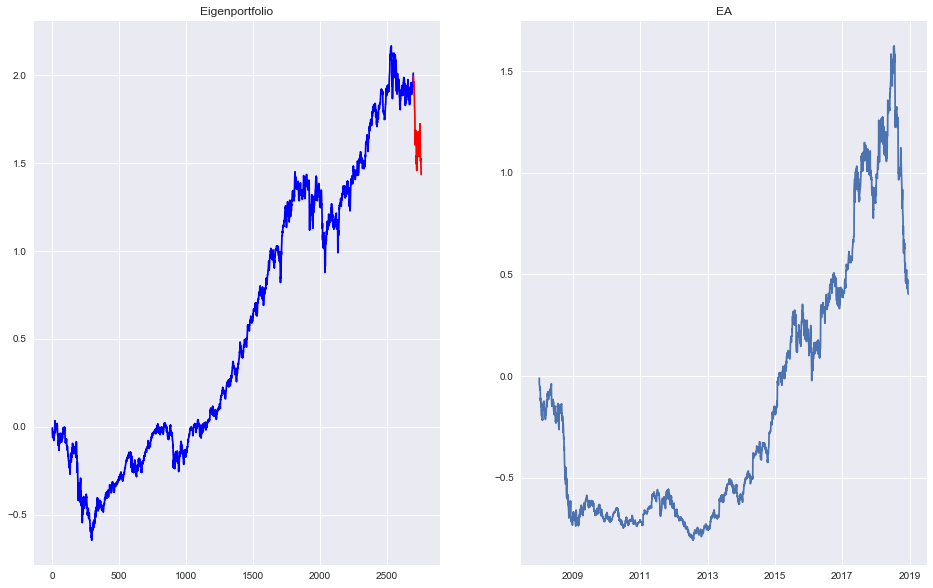

In [499]:
def get_cumulative_returns(dataset, weight_alloc):
        return (((1+dataset).cumprod(axis=0))-1).dot(weight_alloc)

in_sample_idx = np.arange(0, (returns_random.shape[0]-training_period+1))
out_sample_idx = np.arange((returns_random.shape[0]-training_period+1), returns_random.shape[0])

# note that to avoid complexities of short-selling, I used the portfolio that doesn't require shorting stocks 
cumulative_returns_random = get_cumulative_returns(returns_random, eigenportfolio1_random).values
        
f = plt.figure(figsize=(16,10))
ax = plt.subplot(121)
ax.plot(cumulative_returns_random[in_sample_idx], 'b')
ax.plot(out_sample_idx,cumulative_returns_random[out_sample_idx], 'r')
plt.title("Eigenportfolio")
    
ax = plt.subplot(122)
plt.plot((((1+returns_random.loc[:,'EA']).cumprod(axis=0))-1))
plt.title("EA");

To visualize the performance of the eigenportfolios we use both the in-sample and out-of-sample performances, shown in blue and red, respectively. As can be seen from the graphs, the eigenportfolio performs better than the EA stock during the same time periods and by using the weight allocations of our eigenportfolio we actually smooth out the volatility exhibited in the EA stock. The downside is that by using this eigenportfolio with only long positions, we are also using the PC corresponding to the largest eigenvalue, which has the highest correlation with the market.

### MINIMIZING PORTFOLIO VARIANCE 

The minimum variance portfolio states that there is a well-diversified portfolio, consisting of a set of stocks that hedge one anothers risk, which results in the lowest possible risk for a given level of expected return. To construct this portfolio that minimizes the variance, we still define risk as $w^TΣw$, but now we minimize w such that $w*$**1**$=1$, where **1** is a vector of 1s. Using the Lagrange multiplier and solving this minimization problem with the stated constraint, we get a unique solution: $w = (Σ^-$$^1$ **1**) / [($Σ^-$$^1$ **1**)$^T$ * **1**].

As observed, this solution depends on the covariance matrix, which is estimated from the data. Given that the true covariance matrix changes over time, the unique solution of the Minimum Variance Portfolio problem also changes over time. As such, the covariance matrix has to be updated such that the solution indeed gives yields the minimum variance portfolio.

In [411]:
cov_mat_rand_vals = in_sample.cov().values
# find inverse of the covariance matrix 
inv_cov_mat_random = np.linalg.pinv(cov_mat_rand_vals)
# construct minimum variance weights 
inv_dot_ones_random = np.dot(inv_cov_mat_random, np.ones(len(inv_cov_mat_random)))
min_var_weights_random = inv_dot_ones_random/ np.dot( inv_dot_ones_random , np.ones(len(inv_cov_mat_random)))
    
min_var_port_rand = pd.DataFrame(data= min_var_weights_random, columns = ['Weight Allocation'], index = tickers)
min_var_port_rand

,Weight Allocation
HBI,0.030238
RCL,-0.054073
COP,0.053545
WMB,-0.042039
NKE,0.074413
EW,0.100102
MCO,-0.041590
CELG,0.057894
DE,0.040506
EA,0.010232


The weights obtained above are the weight allocations in a portfolio that minimizes variance of this portfolio.

Let's now compare the portfolios associated with the largest eigenvalue and the portfolio corresponding to the minimum variance.

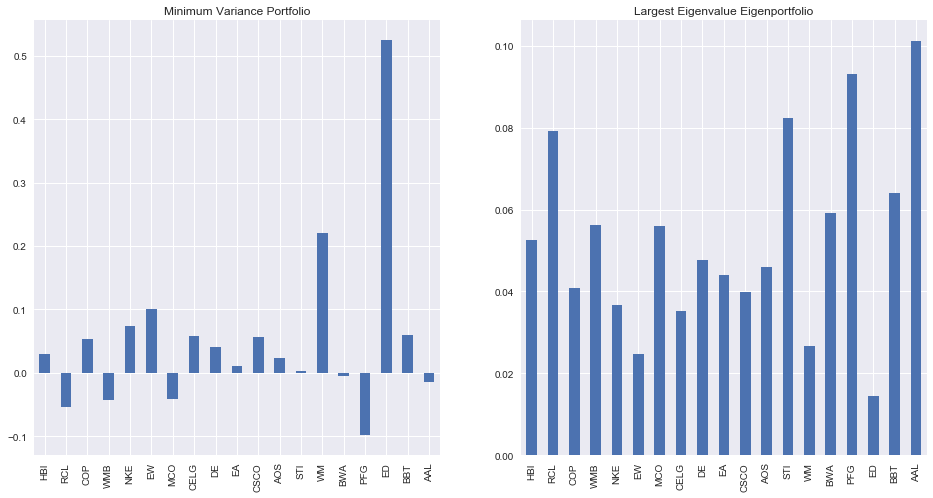

In [420]:
# plot graphs for returns of both portfolio
f = plt.figure(figsize=(16,8))
ax = plt.subplot(121)
min_var_port_rand.plot(kind='bar', ax=ax, legend=False)
plt.title("Minimum Variance Portfolio")
ax = plt.subplot(122)
eigenportfolio1_random.plot(kind='bar', ax=ax, legend=False)
plt.title("Largest Eigenvalue Eigenportfolio");

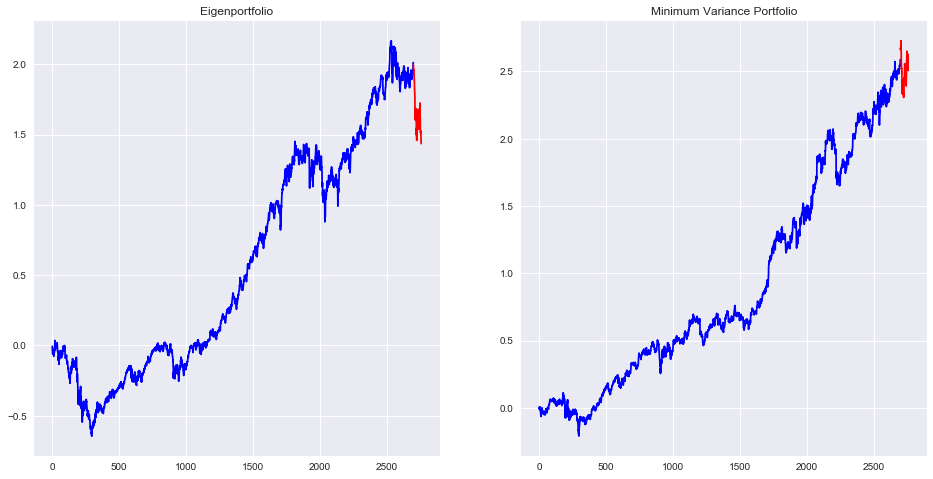

In [432]:
# note that to avoid complexities of short-selling, I used the portfolio that doesn't require shorting stocks 
cum_returns_largest = get_cumulative_returns(returns_random, eigenportfolio1_random).values
cum_returns_min_var = get_cumulative_returns(returns_random, min_var_port_rand).values
        
f = plt.figure(figsize=(16,8))
ax = plt.subplot(121)
ax.plot(cum_returns_largest[in_sample_idx], 'b')
ax.plot(out_sample_idx,cum_returns_largest[out_sample_idx], 'r')
plt.title("Eigenportfolio")
ax = plt.subplot(122)
ax.plot(cum_returns_min_var[in_sample_idx], 'b')
ax.plot(out_sample_idx,cum_returns_min_var[out_sample_idx], 'r')
plt.title("Minimum Variance Portfolio");

As can be seen from the graphs, the minimum variance portfolio does outperform the eigenportfolio, which is the one with the highest variance. This is an interesting finding because as previously discussed, the eigenportfolio has the highest correlation with the markets, but the minimum variance portfolio with the obtained weight allocations still provides higher returns with minimized risk. Thus, this minimization of variance problem with eigendecomposition of the covariance matrix could be used to figure out the optimal weight allocation such that the investor not only maximizes returns but also hedges risk in bad times (because of the low variance this portfolio has the lowest correlation with the market).

## PCA Application

To choose the number of PCs, I use the Cumulative Variance method. We first pick a threshold cumulative percentage of total variance we want the PCs to explain, i.e. around 80% or 90%, and accordingly, determine the number of PCs required to achieve, or surpass this threshold.

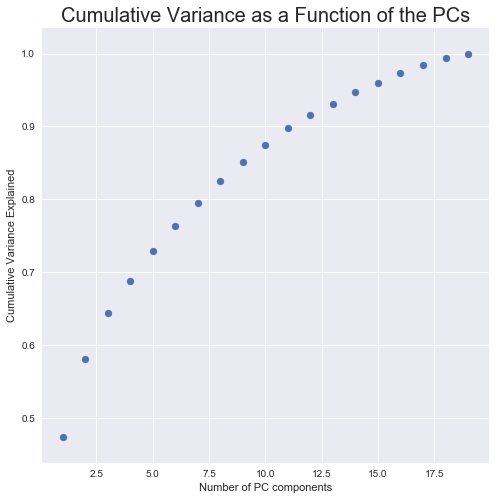

In [505]:
# apply PCA to the returns matrix
pc_range = range(1,20)

total_var_pca_train= []
for pca_n in pc_range:
    pca_transformer_n = PCA(pca_n).fit(returns_random)
    x_train_n = pca_transformer_n.transform(returns_random)
    total_var_explained = np.sum(pca_transformer_n.explained_variance_ratio_)
    total_var_pca_train.append(total_var_explained)

# plot cumulative variance explained in feature set as function of number of PCs to determine pick number of PCs
plt.figure(figsize=(8,8))
plt.scatter(pc_range, total_var_pca_train)
plt.title('Cumulative Variance as a Function of the PCs', fontsize = 20)
plt.xlabel("Number of PC components")
plt.ylabel("Cumulative Variance Explained");

Based on the plot, if we wanted to explain around 75% of the variation in the original portfolio, we could choose to analyze 5 PCs. At this point, the trade-off between maximizing cumulative variance captured by the PCs and the dimensionality reduction arises. Since there are 20 PCs, keeping only 5 of them (so 25%) and capturing around 75% of the variation of the original portfolio seems like a reasonable trade-off.

In [462]:
# find number of PCs that explain at least 70% of variability in the feature set 
sum_variance, component_count = 0, 0
while sum_variance < 0.7:
    sum_variance += pca_transformer_n.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=70% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=70% of Variance:  5
Total Variance Explained by 5 components: 72.862205982059%


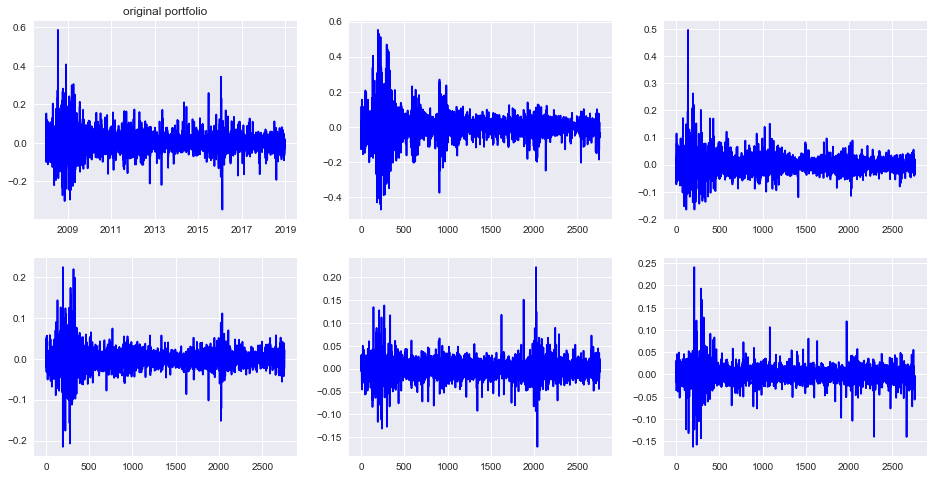

In [498]:
pca_transformer_n = PCA(5).fit(returns_random)
x_train_n = pca_transformer_n.transform(returns_random)
    
f = plt.figure(figsize=(16,8))
ax = plt.subplot(231)
plt.title('original portfolio returns')
ax.plot(returns_random, 'b')
ax = plt.subplot(232)
ax.plot(x_train_n[:, 0], 'b')
plt.title('eigenportfolio 1 returns')
ax = plt.subplot(233)
ax.plot(x_train_n[:, 1], 'b')
plt.title('eigenportfolio 1 returns')
ax = plt.subplot(234)
ax.plot(x_train_n[:, 2], 'b')
ax = plt.subplot(235)
ax.plot(x_train_n[:, 3], 'b')
ax = plt.subplot(236)
ax.plot(x_train_n[:, 4], 'b');

Summing up results, it can be seen that the second principal component offers the weight allocations in the 20 randomly-selected SP500 firms that minimize the variance in the returns compared to the original portfolio where each stock has an equal contribution. However, the trade-off of this minimumized variance is lower returns as well. As expected, the pattern in returns in the eigenportfolio associated with the largest eigenvalue follows the patterns of the original portfolio because it has the largest correlation with the market and also it explains the largest amount of variation in the original portfolio. Therefore, using PCA and eigendecomposition offer alternative and innovative ways of analyzing portfolio construction and weight allocations! 

# BIBLIOGRAPHY 

Kim, D.-H. and Jeong, H. (2005). Systematic analysis of group identification in stocks
markets. Physical Review E, 72:046133.

Giorgia Pasini. (2017). Principal Component Analysis for Stock Portfolio Management. Department of Computer Science. University of Verona. Verona, Italy.

Str Strang, G., Linear Algebra and its Applications, 4th ed., 2005.

MMD J. Leskovec, A. Rajaraman, J. D. Ullman, Mining of Massive Datasets. 